In [1]:
import rlssm
import pandas as pd
import os

In [2]:
par_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
data_path = os.path.join(par_path, 'data/data_experiment.csv')

data = pd.read_csv(data_path, index_col=0)
data = data[data.participant == 10].reset_index(drop=True)

data['block_label'] += 1

data.head()

,participant,block_label,trial_block,f_cor,f_inc,cor_option,inc_option,times_seen,rt,accuracy
0,10,1.0,1.0,61.0,52.0,4,3,1.0,1.285418,0.0
1,10,1.0,2.0,54.0,37.0,4,2,1.5,1.577622,0.0
2,10,1.0,3.0,51.0,51.0,4,3,2.5,1.564731,0.0
3,10,1.0,4.0,50.0,35.0,3,1,2.0,1.217245,1.0
4,10,1.0,5.0,59.0,50.0,4,2,3.0,1.929781,0.0


In [3]:
model = rlssm.LBAModel_2A(1)

Using cached StanModel


In [4]:
# sampling parameters
n_iter = 700
n_chains = 2
n_thin = 5

In [5]:
model_fit = model.fit(
    data,
    thin = n_thin,
    iter = n_iter,
    chains = n_chains)

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


Checks MCMC diagnostics:
n_eff / iter looks reasonable for all parameters
2.0 of 140 iterations ended with a divergence (1.4285714285714286%)
  Try running with larger adapt_delta to remove the divergences
0 of 140 iterations saturated the maximum tree depth of 10 (0.0%)
E-BFMI indicated no pathological behavior


In [6]:
model_fit.rhat.describe()

,rhat
count,5.000000
mean,1.016356
std,0.008087
min,1.007710
25%,1.009132
50%,1.016074
75%,1.022996
max,1.025870


In [7]:
model_fit.rhat.head()

,rhat,variable
0,1.025870,k
1,1.009132,A
2,1.016074,tau
3,1.022996,drift_cor
4,1.007710,drift_inc


In [8]:
model_fit.waic

{'lppd': -237.72566174968202,
 'p_waic': 3.122236004709617,
 'waic': 481.69579550878325,
 'waic_se': 28.77144099171388}

### Posteriors

In [9]:
model_fit.samples

,chain,draw,transf_k,transf_A,transf_tau,transf_drift_cor,transf_drift_inc
0,0,62,3.669709,0.850096,0.096483,2.861367,1.884172
1,0,32,4.045519,0.944517,0.048823,2.989458,2.166580
2,0,7,3.340165,0.938221,0.171876,2.866527,2.127082
3,0,3,3.835383,0.981928,0.102350,3.099966,2.235176
4,0,36,3.586005,0.924545,0.155582,3.036587,2.115467
...,...,...,...,...,...,...,...
135,1,35,3.275540,0.517982,0.180501,2.754708,1.812676
136,1,49,4.462554,0.960999,0.019331,3.241174,2.556430
137,1,61,2.883618,1.078033,0.210562,2.688096,1.800621
138,1,11,4.290410,1.087636,0.014903,3.176732,2.458804


In [10]:
model_fit.trial_samples

OrderedDict([('k_t',
              array([[3.66970874, 3.66970874, 3.66970874, ..., 3.66970874, 3.66970874,
                      3.66970874],
                     [4.04551877, 4.04551877, 4.04551877, ..., 4.04551877, 4.04551877,
                      4.04551877],
                     [3.34016478, 3.34016478, 3.34016478, ..., 3.34016478, 3.34016478,
                      3.34016478],
                     ...,
                     [2.88361814, 2.88361814, 2.88361814, ..., 2.88361814, 2.88361814,
                      2.88361814],
                     [4.29040952, 4.29040952, 4.29040952, ..., 4.29040952, 4.29040952,
                      4.29040952],
                     [2.77375808, 2.77375808, 2.77375808, ..., 2.77375808, 2.77375808,
                      2.77375808]])),
             ('A_t',
              array([[0.85009641, 0.85009641, 0.85009641, ..., 0.85009641, 0.85009641,
                      0.85009641],
                     [0.94451657, 0.94451657, 0.94451657, ..., 0.94451657, 

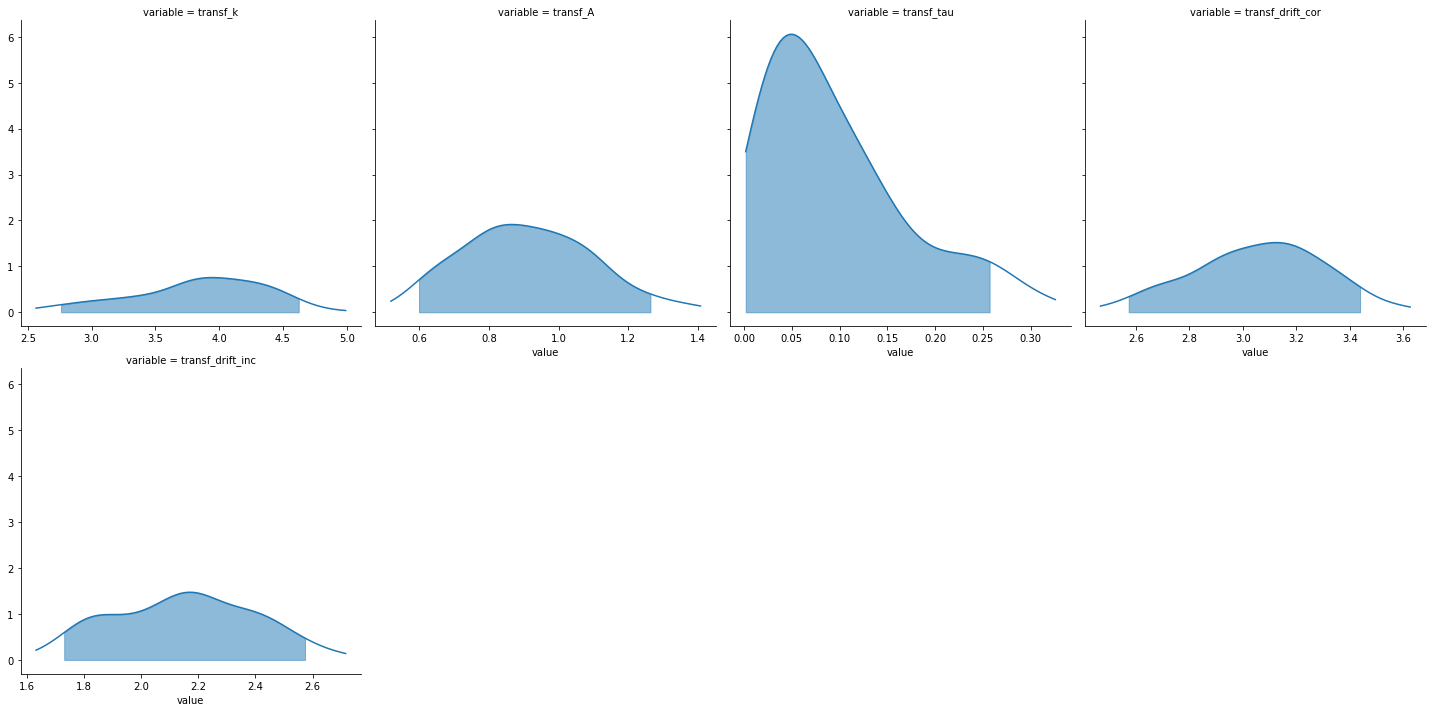

In [11]:
model_fit.plot_posteriors(height=5, show_intervals='HDI');

In [12]:
pp_rt, pp_acc = model_fit.get_posterior_predictives(n_posterior_predictives=100)

In [13]:
pp_rt

array([[1.67227333, 1.19625618, 1.35499495, ..., 1.61226654, 1.28342245,
        2.87107757],
       [2.24189042, 1.14633505, 1.77567165, ..., 2.06433049, 1.28386355,
        1.24660241],
       [1.46399255, 2.30636745, 1.27645439, ..., 1.59058809, 1.43104255,
        1.7892862 ],
       ...,
       [1.17668837, 1.27226256, 1.04485603, ..., 1.40904885, 2.16827302,
        1.63109905],
       [1.12300287, 1.49991923, 1.54671045, ..., 1.3211988 , 2.04345841,
        1.0473686 ],
       [1.50107356, 3.18078481, 2.57910438, ..., 1.5625403 , 1.51545854,
        1.28611096]])

In [14]:
pp_acc

array([[1., 0., 1., ..., 1., 0., 0.],
       [1., 1., 0., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 0., ..., 0., 1., 1.]])

In [15]:
pp_summary = model_fit.get_posterior_predictives_summary(n_posterior_predictives=100)
pp_summary

,mean_accuracy,mean_rt,skewness,quant_10_rt_incorrect,quant_30_rt_incorrect,quant_50_rt_incorrect,quant_70_rt_incorrect,quant_90_rt_incorrect,quant_10_rt_correct,quant_30_rt_correct,quant_50_rt_correct,quant_70_rt_correct,quant_90_rt_correct
sample,,,,,,,,,,,,,
1,0.799163,1.614504,13.487908,1.157773,1.423071,1.579926,1.788719,2.137493,1.050592,1.238341,1.430955,1.595490,2.004905
2,0.698745,1.577363,2.343839,1.168040,1.407806,1.604730,1.865734,2.347868,1.033369,1.204606,1.404072,1.672573,2.046526
3,0.686192,1.457550,1.703131,1.173095,1.290601,1.454276,1.637265,1.932010,1.011161,1.173164,1.331002,1.539179,1.962778
4,0.761506,1.518276,2.902984,1.108983,1.333951,1.482438,1.695597,2.171418,1.016300,1.239588,1.375935,1.594626,1.984548
5,0.765690,1.482258,6.343259,1.166214,1.325327,1.469179,1.598495,2.083771,1.020502,1.223105,1.383049,1.554726,1.824439
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.815900,1.434669,1.525270,1.088204,1.269907,1.417493,1.618231,1.990304,1.044163,1.223703,1.358508,1.522673,1.831072
97,0.711297,1.505379,1.400357,1.165943,1.382046,1.510394,1.732830,2.244687,1.040893,1.188039,1.322435,1.609117,2.043672
98,0.799163,1.443413,1.146682,1.086934,1.303866,1.514028,1.671234,2.114590,0.972940,1.184710,1.325524,1.520235,1.950058


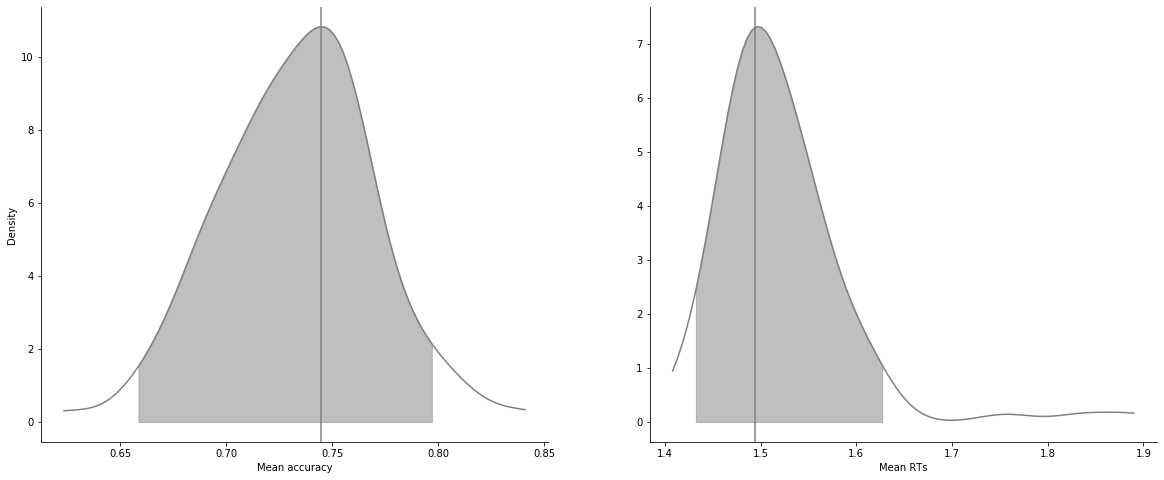

In [16]:
model_fit.plot_mean_posterior_predictives(n_posterior_predictives=100, figsize=(20,8), show_intervals='HDI');

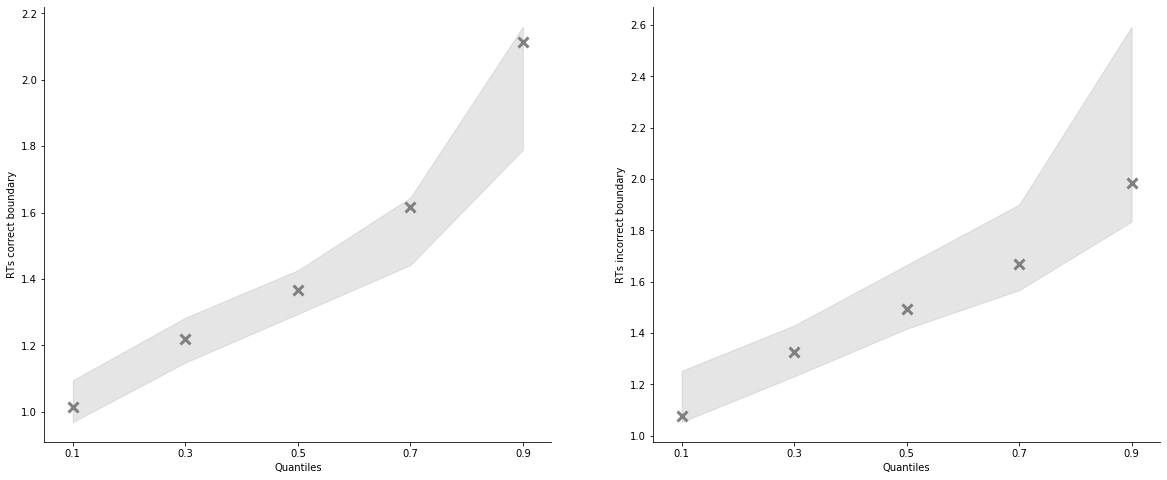

In [17]:
model_fit.plot_quantiles_posterior_predictives(n_posterior_predictives=100, kind='shades');

In [18]:
import numpy as np

In [19]:
data['choice_pair'] = 'AB'
data.loc[(data.cor_option == 3) & (data.inc_option == 1), 'choice_pair'] = 'AC'
data.loc[(data.cor_option == 4) & (data.inc_option == 2), 'choice_pair'] = 'BD'
data.loc[(data.cor_option == 4) & (data.inc_option == 3), 'choice_pair'] = 'CD'

data['block_bins'] = pd.cut(data.trial_block, 8, labels=np.arange(1, 9))

In [20]:
data.head()

,index,participant,block_label,trial_block,f_cor,f_inc,cor_option,inc_option,times_seen,rt,accuracy,accuracy_rescale,choice_pair,block_bins
0,0,10,1.0,1.0,61.0,52.0,4,3,1.0,1.285418,0.0,2,CD,1
1,1,10,1.0,2.0,54.0,37.0,4,2,1.5,1.577622,0.0,2,BD,1
2,2,10,1.0,3.0,51.0,51.0,4,3,2.5,1.564731,0.0,2,CD,1
3,3,10,1.0,4.0,50.0,35.0,3,1,2.0,1.217245,1.0,1,AC,1
4,4,10,1.0,5.0,59.0,50.0,4,2,3.0,1.929781,0.0,2,BD,1


In [21]:
model_fit.get_grouped_posterior_predictives_summary(
                grouping_vars=['block_label', 'choice_pair'],
                quantiles=[.3, .5, .7],
                n_posterior_predictives=100)

mean_accuracy   mean_rt  skewness  \
block_label choice_pair sample                                      
1.0         AB          1                0.75  1.480688  2.502428   
                        2                0.75  1.494594  0.638907   
                        3                0.70  1.469694  0.803160   
                        4                0.75  1.599615  0.447825   
                        5                0.60  1.376990  0.803442   
...                                       ...       ...       ...   
3.0         CD          96               0.85  1.565873  1.915931   
                        97               0.65  1.527317  0.883126   
                        98               0.65  1.589911  2.299556   
                        99               0.85  1.309896  0.937661   
                        100              0.80  1.585306  1.786769   

                                quant_30_rt_incorrect  quant_30_rt_correct  \
block_label choice_pair sample                                               
1.0         AB          1                    1.024518             1.337262   
                        2                    1.276671             1.304920   
                        3                    1.377936             1.306803   
                        4                    1.635178             1.299746   
                        5                    1.278217             1.263027   
...                                               ...                  ...   
3.0         CD          96                   1.406052             1.148709   
                        97                   1.350817             1.273823   
                        98                   1.215366             1.275721   
                        99                   1.121466             1.139482   
                        100                  1.063191             1.419828   

                                quant_50_rt_incorrect  quant_50_rt_correct  \
block_label choice_pair sample                                               
1.0         AB          1                    1.176697             1.429384   
                        2                    1.368122             1.462239   
                        3                    1.607192             1.426029   
                        4                    1.663089             1.517293   
                        5                    1.376664             1.332366   
...                                               ...                  ...   
3.0         CD          96                   1.572862             1.521186   
                        97                   1.860067             1.364047   
                        98                   1.510554             1.483562   
                        99                   1.217709             1.296632   
                        100                  1.335941             1.494361   

                                quant_70_rt_incorrect  quant_70_rt_correct  
block_label choice_pair sample                                              
1.0         AB          1                    1.184811             1.632312  
                        2                    1.592027             1.717485  
                        3                    1.739389             1.511035  
                        4                    1.767739             1.702939  
                        5                    1.481102             1.425297  
...                                               ...                  ...  
3.0         CD          96                   1.668317             1.684704  
                        97                   2.148044             1.472886  
                        98                   1.572747             1.718701  
                        99                   1.262999             1.478310  
                        100                  1.758357             1.715775  

[1200 rows x 9 columns]

In [22]:
model_fit.get_grouped_posterior_predictives_summary(
                grouping_vars=['block_bins'],
                quantiles=[.3, .5, .7],
                n_posterior_predictives=100)

mean_accuracy   mean_rt  skewness  quant_30_rt_incorrect  \
block_bins sample                                                             
1          1            0.666667  1.822421  2.194476               1.374931   
           2            0.633333  1.538414  0.259050               1.501086   
           3            0.600000  1.514489  1.466880               1.433615   
           4            0.666667  1.426424  0.583451               1.353432   
           5            0.733333  1.555820  0.799654               1.539074   
...                          ...       ...       ...                    ...   
8          96           0.586207  1.497093  0.168614               1.219660   
           97           0.689655  1.502492  4.012677               1.518617   
           98           0.827586  1.349401  1.762134               1.207493   
           99           0.793103  1.401210  0.988129               1.339981   
           100          0.655172  1.467377  2.354579               1.367404   

                   quant_30_rt_correct  quant_50_rt_incorrect  \
block_bins sample                                               
1          1                  1.336806               1.552943   
           2                  1.251568               1.625164   
           3                  1.269109               1.600592   
           4                  1.178183               1.560177   
           5                  1.243777               1.633894   
...                                ...                    ...   
8          96                 1.305840               1.347734   
           97                 1.147707               1.617530   
           98                 1.164657               1.241302   
           99                 1.155294               1.434166   
           100                1.240671               1.390406   

                   quant_50_rt_correct  quant_70_rt_incorrect  \
block_bins sample                                               
1          1                  1.489791               2.269784   
           2                  1.408985               1.884665   
           3                  1.371785               1.817720   
           4                  1.254533               1.617040   
           5                  1.405582               1.925176   
...                                ...                    ...   
8          96                 1.520579               1.687630   
           97                 1.249135               1.776427   
           98                 1.228657               1.507990   
           99                 1.321854               1.524493   
           100                1.330173               1.528429   

                   quant_70_rt_correct  
block_bins sample                       
1          1                  1.673727  
           2                  1.646852  
           3                  1.472953  
           4                  1.528058  
           5                  1.623275  
...                                ...  
8          96                 1.728446  
           97                 1.352476  
           98                 1.291924  
           99                 1.462061  
           100                1.421323  

[800 rows x 9 columns]

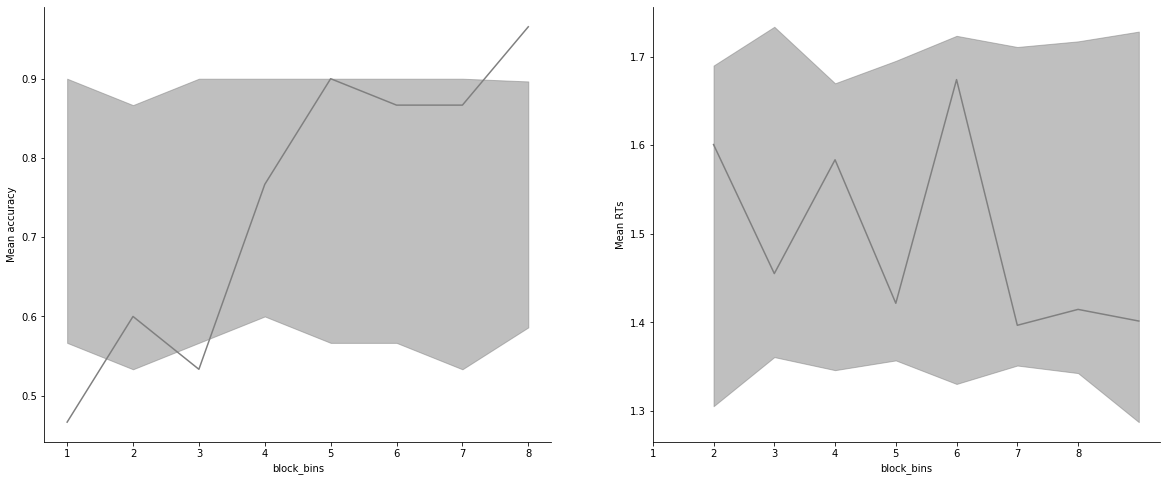

In [23]:
model_fit.plot_mean_grouped_posterior_predictives(grouping_vars=['block_bins'], 
                                                  n_posterior_predictives=100, 
                                                  figsize=(20,8));

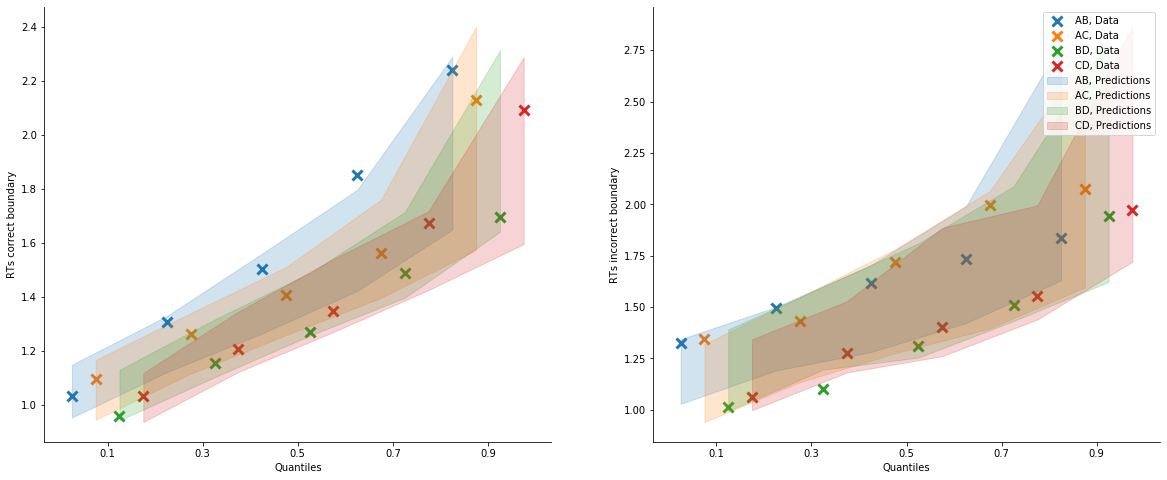

In [24]:
model_fit.plot_quantiles_grouped_posterior_predictives(
    n_posterior_predictives=100,
    grouping_var='choice_pair',
    kind='shades',
    quantiles=[.1, .3, .5, .7, .9]);

In [25]:
sv = model_fit.last_values
sv

,chain,draw,warmup,A,drift_cor,drift_inc,k,tau
69,0,69,0,0.730618,3.406830,2.368292,4.27831,-2.573289
139,1,69,0,0.349217,3.515723,2.628843,4.76474,-4.380532
